In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
'''
from tensorflow.keras.datasets import reuters
from tensorflow.keras.datasets import cifar10

# Download the mnist dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()

# Download the mnist fashion dataset
data_train, data_test = tf.keras.datasets.fashion_mnist.load_data()

# Download the CIFAR-10 dataset
data_train, data_test  = tf.keras.datasets.cifar10.load_data()

# Download the CIFAR-100 dataset
data_train, data_test  = tf.keras.datasets.cifar100.load_data()

'''

'\nfrom tensorflow.keras.datasets import reuters\nfrom tensorflow.keras.datasets import cifar10\n\n# Download the mnist dataset\ndata_train, data_test = tf.keras.datasets.mnist.load_data()\n\n# Download the mnist fashion dataset\ndata_train, data_test = tf.keras.datasets.fashion_mnist.load_data()\n\n# Download the CIFAR-10 dataset\ndata_train, data_test  = tf.keras.datasets.cifar10.load_data()\n\n# Download the CIFAR-100 dataset\ndata_train, data_test  = tf.keras.datasets.cifar100.load_data()\n\n'

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 17s 0us/step


In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

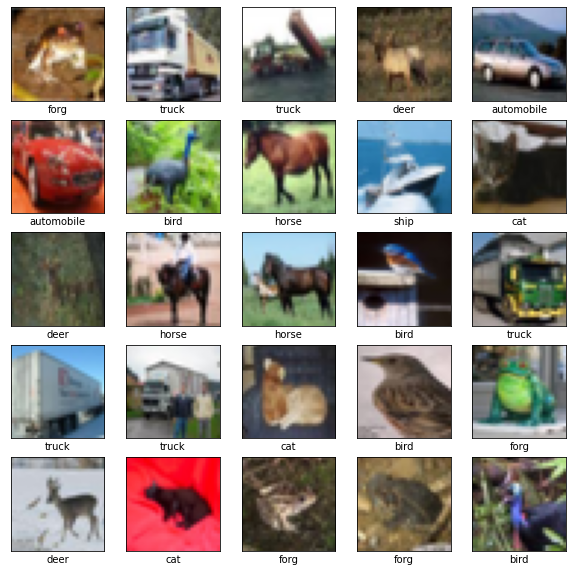

In [8]:
#Verify the data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [9]:
#Create the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))


In [10]:
#Architecture of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Add Dense Layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [16]:
#Compile and train the model

model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5492 - accuracy: 0.4335 - val_loss: 1.2649 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1833 - accuracy: 0.5831 - val_loss: 1.1613 - val_accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0303 - accuracy: 0.6373 - val_loss: 1.0857 - val_accuracy: 0.6281
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9379 - accuracy: 0.6691 - val_loss: 0.9648 - val_accuracy: 0.6646
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8631 - accuracy: 0.6978 - val_loss: 0.9044 - val_accuracy: 0.6858
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8055 - accuracy: 0.7193 - val_loss: 0.8884 - val_accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7593 - accuracy: 0.7337 - val_loss: 0.8959 -

313/313 - 1s - loss: 0.8846 - accuracy: 0.7065


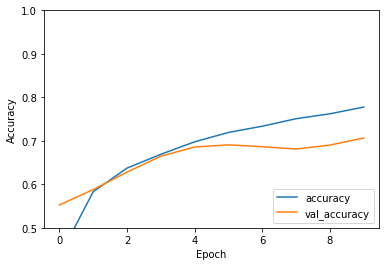

In [18]:
#Evaluate the model
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)


In [19]:
print (test_loss)

0.8845728635787964


In [20]:
print (test_acc)

0.7064999938011169


In [ ]:
import tensorflow as tf

In [22]:
t = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
pad = tf.constant([[1,1],[1,1]])# 위, 아래, 오른, 왼의 순서로 패딩 
print (t)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [24]:
print (tf.pad(t, pad, "CONSTANT"))

tf.Tensor(
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
